In [1]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VARResults
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import VAR

In [2]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
confirmed_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [4]:
recovered_data = pd.read_csv('time_series_covid19_recovered_global.csv')

In [5]:
recovered_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [6]:
deaths_data = pd.read_csv('time_series_covid19_deaths_global.csv')

In [7]:
deaths_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


Extract the name of colomns containing dates

In [8]:
dates_conf = confirmed_data.columns[4:]
dates_death = deaths_data.columns[4:]
print(dates_conf)
print(dates_death)
# s'assurer que les dates sont les mêmes pour les 2 DataFrames
if dates_conf.equals(dates_death):
    print("Les dates sont les mêmes")

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)
Les dates sont les mêmes


In [9]:
dates_conf = confirmed_data.columns[4:]
dates_recovered = deaths_data.columns[4:]
print(dates_conf)
print(dates_recovered)
# s'assurer que les dates sont les mêmes pour les 2 DataFrames
if dates_conf.equals(dates_recovered):
    print("Les dates sont les mêmes")

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)
Les dates sont les mêmes


In [10]:
df_conf_melted = confirmed_data.melt(id_vars=['Province/State',
                              'Country/Region', 'Lat', 'Long'],
                              value_vars=dates_conf,
                              var_name='Date',
                              value_name='Confirmed')
df_death_melted = deaths_data.melt(id_vars=['Province/State',
                                'Country/Region', 'Lat', 'Long'],
                                value_vars=dates_death,
                                var_name='Date',
                                value_name='Deaths')
df_recovered_melted = recovered_data.melt(id_vars=['Province/State',
                                'Country/Region', 'Lat', 'Long'],
                                value_vars=dates_recovered,
                                var_name='Date',
                                value_name='Recovered')

In [11]:
df_conf_melted


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,36151
64900,NaN,Western Sahara,24.215500,-12.885800,9/21/20,10
64901,NaN,Yemen,15.552727,48.516388,9/21/20,2028
64902,NaN,Zambia,-13.133897,27.849332,9/21/20,14175


In [12]:
df_conf_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  19764 non-null  object 
 1   Country/Region  64904 non-null  object 
 2   Lat             64904 non-null  float64
 3   Long            64904 non-null  float64
 4   Date            64904 non-null  object 
 5   Confirmed       64904 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [13]:
# Filtrer les données pour le pays "US"
us_data = df_conf_melted[df_conf_melted['Country/Region'] == 'US']

# Calculer la somme des cas confirmés pour "US"
total_confirmed_us = us_data['Confirmed'].sum()

print(f"Le total des cas confirmés pour les États-Unis (US) est : {total_confirmed_us}")

Le total des cas confirmés pour les États-Unis (US) est : 544027944


In [14]:
df_death_melted

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,265
64900,NaN,Western Sahara,24.215500,-12.885800,9/21/20,1
64901,NaN,Yemen,15.552727,48.516388,9/21/20,586
64902,NaN,Zambia,-13.133897,27.849332,9/21/20,331


In [15]:
df_recovered_melted

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,9/21/20,13629


In [16]:
df_recovered_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61732 entries, 0 to 61731
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  16348 non-null  object 
 1   Country/Region  61732 non-null  object 
 2   Lat             61732 non-null  float64
 3   Long            61732 non-null  float64
 4   Date            61732 non-null  object 
 5   Recovered       61732 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ MB


In [17]:
print(df_conf_melted.shape)
print(df_death_melted.shape)
print(df_recovered_melted.shape)

(64904, 6)
(64904, 6)
(61732, 6)


combiner ces DataFrames séparés en un seul afin qu’il soit plus facile d’effectuer des analyses par la suite :

In [18]:
df_combined = pd.concat([df_conf_melted,
                         df_death_melted["Deaths"]],
                         axis = 1,
                         sort = False)
df_combined

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,36151,265
64900,NaN,Western Sahara,24.215500,-12.885800,9/21/20,10,1
64901,NaN,Yemen,15.552727,48.516388,9/21/20,2028,586
64902,NaN,Zambia,-13.133897,27.849332,9/21/20,14175,331


In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  19764 non-null  object 
 1   Country/Region  64904 non-null  object 
 2   Lat             64904 non-null  float64
 3   Long            64904 non-null  float64
 4   Date            64904 non-null  object 
 5   Confirmed       64904 non-null  int64  
 6   Deaths          64904 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.5+ MB


In [20]:
df_combined_f1 = df_combined.merge(df_recovered_melted, on=["Province/State", "Country/Region", "Date"], suffixes=('_Recovered', '_Confirmed'))

In [21]:
df_combined_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61488 entries, 0 to 61487
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  16348 non-null  object 
 1   Country/Region  61488 non-null  object 
 2   Lat_Recovered   61488 non-null  float64
 3   Long_Recovered  61488 non-null  float64
 4   Date            61488 non-null  object 
 5   Confirmed       61488 non-null  int64  
 6   Deaths          61488 non-null  int64  
 7   Lat_Confirmed   61488 non-null  float64
 8   Long_Confirmed  61488 non-null  float64
 9   Recovered       61488 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 5.2+ MB


In [22]:
### Convertir la colonne Date en format datetime
import datetime
df_combined_f1['Date'] = pd.to_datetime(df_combined_f1['Date'])
df_combined_f1

,Province/State,Country/Region,Lat_Recovered,Long_Recovered,Date,Confirmed,Deaths,Lat_Confirmed,Long_Confirmed,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,33.939110,67.709953,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,41.153300,20.168300,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,28.033900,1.659600,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,42.506300,1.521800,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,-11.202700,17.873900,0
...,...,...,...,...,...,...,...,...,...,...
61483,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,31.952200,35.233200,24428
61484,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,24.215500,-12.885800,8
61485,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586,15.552727,48.516388,1235
61486,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331,-13.133897,27.849332,13629


calculer le pourcentage de décès par rapport au nombre de cas confirmés

In [23]:
df_combined_f1['Percentage_Deaths'] = df_combined_f1['Deaths'] / df_combined_f1['Confirmed']
df_combined_f1['Percentage_Recovered'] = df_combined_f1['Recovered'] / df_combined_f1['Confirmed']

In [24]:
df_combined_f1

,Province/State,Country/Region,Lat_Recovered,Long_Recovered,Date,Confirmed,Deaths,Lat_Confirmed,Long_Confirmed,Recovered,Percentage_Deaths,Percentage_Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,33.939110,67.709953,0,NaN,NaN
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,41.153300,20.168300,0,NaN,NaN
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,28.033900,1.659600,0,NaN,NaN
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,42.506300,1.521800,0,NaN,NaN
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,-11.202700,17.873900,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61483,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,31.952200,35.233200,24428,0.007330,0.675721
61484,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,24.215500,-12.885800,8,0.100000,0.800000
61485,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586,15.552727,48.516388,1235,0.288955,0.608974
61486,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331,-13.133897,27.849332,13629,0.023351,0.961481


In [25]:
df_combined_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61488 entries, 0 to 61487
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province/State        16348 non-null  object        
 1   Country/Region        61488 non-null  object        
 2   Lat_Recovered         61488 non-null  float64       
 3   Long_Recovered        61488 non-null  float64       
 4   Date                  61488 non-null  datetime64[ns]
 5   Confirmed             61488 non-null  int64         
 6   Deaths                61488 non-null  int64         
 7   Lat_Confirmed         61488 non-null  float64       
 8   Long_Confirmed        61488 non-null  float64       
 9   Recovered             61488 non-null  int64         
 10  Percentage_Deaths     51817 non-null  float64       
 11  Percentage_Recovered  51817 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 6.1+ M

In [26]:
###Parce qu’il y a des cellules qui sont des NaNs (causés par la division par zéro), il est important de les remplacer par des 0 :

df_combined_f1.fillna(0, inplace=True)
df_combined_f1

,Province/State,Country/Region,Lat_Recovered,Long_Recovered,Date,Confirmed,Deaths,Lat_Confirmed,Long_Confirmed,Recovered,Percentage_Deaths,Percentage_Recovered
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,33.939110,67.709953,0,0.000000,0.000000
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,41.153300,20.168300,0,0.000000,0.000000
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,28.033900,1.659600,0,0.000000,0.000000
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,42.506300,1.521800,0,0.000000,0.000000
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,-11.202700,17.873900,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
61483,0,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,31.952200,35.233200,24428,0.007330,0.675721
61484,0,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,24.215500,-12.885800,8,0.100000,0.800000
61485,0,Yemen,15.552727,48.516388,2020-09-21,2028,586,15.552727,48.516388,1235,0.288955,0.608974
61486,0,Zambia,-13.133897,27.849332,2020-09-21,14175,331,-13.133897,27.849332,13629,0.023351,0.961481


In [27]:
df_combined_f1.dtypes

Province/State                  object
Country/Region                  object
Lat_Recovered                  float64
Long_Recovered                 float64
Date                    datetime64[ns]
Confirmed                        int64
Deaths                           int64
Lat_Confirmed                  float64
Long_Confirmed                 float64
Recovered                        int64
Percentage_Deaths              float64
Percentage_Recovered           float64
dtype: object

In [28]:
# Créez les colonnes 'Month' et 'Year' à partir de la colonne 'Date'
df_combined_f1['Month'] = df_combined_f1['Date'].dt.month

In [29]:
# Filtrer les données pour le pays "US"
us_data = df_combined_f1[df_combined_f1['Country/Region'] == 'US']

# Regrouper les données par date
us_aggregated_data = us_data.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Percentage_Deaths': 'mean',
    'Percentage_Recovered': 'mean',
    'Month': 'first'
}).reset_index()


In [30]:
us_aggregated_data

,Date,Confirmed,Deaths,Recovered,Percentage_Deaths,Percentage_Recovered,Month
0,2020-01-22,1,0,0,0.000000,0.000000,1
1,2020-01-23,1,0,0,0.000000,0.000000,1
2,2020-01-24,2,0,0,0.000000,0.000000,1
3,2020-01-25,2,0,0,0.000000,0.000000,1
4,2020-01-26,5,0,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...
239,2020-09-17,6674411,197633,2540334,0.029611,0.380608,9
240,2020-09-18,6723933,198570,2556465,0.029532,0.380204,9
241,2020-09-19,6768119,199282,2577446,0.029444,0.380822,9
242,2020-09-20,6804814,199509,2590671,0.029319,0.380712,9


In [31]:
# Calculer la somme des cas confirmés pour "US"
total_confirmed_us = us_aggregated_data['Confirmed'].sum()

print(f"Le total des cas confirmés pour les États-Unis (US) est : {total_confirmed_us}")

Le total des cas confirmés pour les États-Unis (US) est : 544027944


In [32]:
us_aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  244 non-null    datetime64[ns]
 1   Confirmed             244 non-null    int64         
 2   Deaths                244 non-null    int64         
 3   Recovered             244 non-null    int64         
 4   Percentage_Deaths     244 non-null    float64       
 5   Percentage_Recovered  244 non-null    float64       
 6   Month                 244 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 13.5 KB


EDA

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Select the "Confirmed" column
confirmed_series = us_aggregated_data['Confirmed']

# Perform the ADF test
result = adfuller(confirmed_series)

# Display the ADF test results
print("ADF Stationarity Test Results for 'Confirmed':")
print(f"ADF Test Statistic: {result[0]}")
print(f'p-value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'    {key}: {value}')

# Add a condition to print 'stationary' or 'not stationary'
if result[1] <= 0.05:
    print("Result: Stationary (Reject null hypothesis)")
else:
    print("Result: Not Stationary (Fail to reject null hypothesis)")

ADF Stationarity Test Results for 'Confirmed':
ADF Test Statistic: 2.101425405313586
p-value: 0.9987910822263308
Number of Lags Used: 11
Number of Observations: 232
Critical Values:
    1%: -3.458854867412691
    5%: -2.8740800599399323
    10%: -2.573453223097503
Result: Not Stationary (Fail to reject null hypothesis)


In [34]:
# Calculate the first-order difference for the "Confirmed" column
us_aggregated_data['Confirmed_diff1'] = us_aggregated_data['Confirmed'] - us_aggregated_data['Confirmed'].shift(1)

In [35]:
us_aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  244 non-null    datetime64[ns]
 1   Confirmed             244 non-null    int64         
 2   Deaths                244 non-null    int64         
 3   Recovered             244 non-null    int64         
 4   Percentage_Deaths     244 non-null    float64       
 5   Percentage_Recovered  244 non-null    float64       
 6   Month                 244 non-null    int64         
 7   Confirmed_diff1       243 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 15.4 KB


In [36]:
# Supprimer les lignes contenant NaN dans la colonne "Confirmed_diff1"
us_aggregated_data.dropna(subset=['Confirmed_diff1'], inplace=True)

# Réinitialiser l'index
us_aggregated_data.reset_index(drop=True, inplace=True)

# Afficher les informations mises à jour du DataFrame
print(us_aggregated_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  243 non-null    datetime64[ns]
 1   Confirmed             243 non-null    int64         
 2   Deaths                243 non-null    int64         
 3   Recovered             243 non-null    int64         
 4   Percentage_Deaths     243 non-null    float64       
 5   Percentage_Recovered  243 non-null    float64       
 6   Month                 243 non-null    int64         
 7   Confirmed_diff1       243 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 15.3 KB
None


In [37]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Select the "Confirmed_diff1" column
confirmed_series1 = us_aggregated_data['Confirmed_diff1']

# Perform the ADF test
result = adfuller(confirmed_series1)

# Display the ADF test results
print("ADF Stationarity Test Results for 'Confirmed_diff1':")
print(f"ADF Test Statistic: {result[0]}")
print(f'p-value: {result[1]}')
print(f'Number of Lags Used: {result[2]}')
print(f'Number of Observations: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'    {key}: {value}')

# Add a condition to print 'stationary' or 'not stationary'
if result[1] <= 0.05:
    print("Result: Stationary (Reject null hypothesis)")
else:
    print("Result: Not Stationary (Fail to reject null hypothesis)")

ADF Stationarity Test Results for 'Confirmed_diff1':
ADF Test Statistic: -1.6892737521001708
p-value: 0.4366472636332889
Number of Lags Used: 15
Number of Observations: 227
Critical Values:
    1%: -3.4594900381360034
    5%: -2.8743581895178485
    10%: -2.573601605503697
Result: Not Stationary (Fail to reject null hypothesis)


In [38]:
# Créer une nouvelle variable "Log_Confirmed_diff1" contenant le log de "Confirmed_diff1"
us_aggregated_data['Log_Confirmed_diff1'] = np.log(us_aggregated_data['Confirmed_diff1'])

In [39]:
us_aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  243 non-null    datetime64[ns]
 1   Confirmed             243 non-null    int64         
 2   Deaths                243 non-null    int64         
 3   Recovered             243 non-null    int64         
 4   Percentage_Deaths     243 non-null    float64       
 5   Percentage_Recovered  243 non-null    float64       
 6   Month                 243 non-null    int64         
 7   Confirmed_diff1       243 non-null    float64       
 8   Log_Confirmed_diff1   243 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 17.2 KB


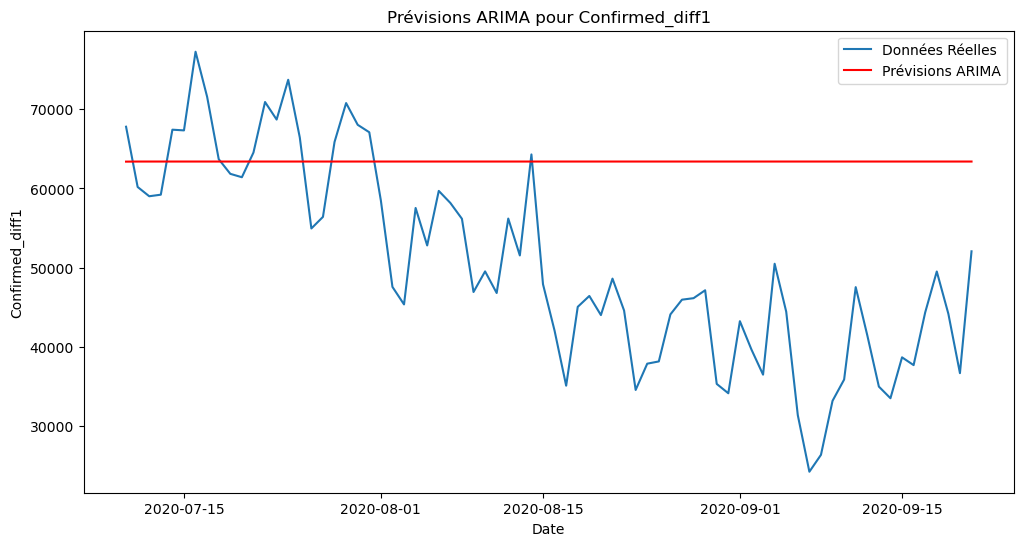

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assurez-vous que votre DataFrame a été trié par date si ce n'est pas déjà le cas
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Divisez les données en échantillon d'apprentissage et échantillon de test
split_date = '2020-07-10'  # Date de division
train_data = us_aggregated_data[us_aggregated_data['Date'] < split_date]
test_data = us_aggregated_data[us_aggregated_data['Date'] >= split_date]

# Sélectionnez la colonne "Confirmed_diff1" pour l'apprentissage et le test
train_series = train_data['Confirmed_diff1']
test_series = test_data['Confirmed_diff1']

# Créez et ajustez le modèle ARIMA sur l'échantillon d'apprentissage
p = 1  # Ordre de la composante autorégressive
d = 1  # Ordre de différenciation
q = 1  # Ordre de la composante moyenne mobile

model = ARIMA(train_series, order=(p, d, q))
model_fit = model.fit()

# Prévision sur l'échantillon de test
forecast = model_fit.forecast(steps=len(test_series))

# Affichez les prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_series, label='Données Réelles')
plt.plot(test_data['Date'], forecast, color='red', label='Prévisions ARIMA')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff1')
plt.legend()
plt.title('Prévisions ARIMA pour Confirmed_diff1')
plt.show()

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calcul du R2
r2 = r2_score(test_series, forecast)

# Calcul du RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_series, forecast))

# Calcul du MAE (Mean Absolute Error)
mae = mean_absolute_error(test_series, forecast)

# Afficher les mesures de performance
print(f"R2 : {r2:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")

R2 : -1.05
RMSE : 17968.90
MAE : 15062.23


In [42]:
from sklearn.metrics import r2_score

# Prévisions sur l'échantillon d'apprentissage
train_forecast = model_fit.predict(start=0, end=len(train_series)-1, typ='levels')

# Calcul du R2 sur l'échantillon d'apprentissage
r2_train = r2_score(train_series, train_forecast)

# Afficher le R2 sur l'échantillon d'apprentissage
print(f"R2 sur l'échantillon d'apprentissage : {r2_train:.2f}")

R2 sur l'échantillon d'apprentissage : 0.97


R2 sur l'échantillon d'apprentissage : 0.96
R2 sur l'échantillon de test : -2.24
          Date    Prévisions  Données Réelles
236 2020-09-15  34295.772543          38690.0
237 2020-09-16  34720.779449          37709.0
238 2020-09-17  34956.660026          44360.0
239 2020-09-18  35087.574716          49522.0
240 2020-09-19  35160.232906          44186.0
241 2020-09-20  35200.558500          36695.0
242 2020-09-21  35222.939370          52070.0


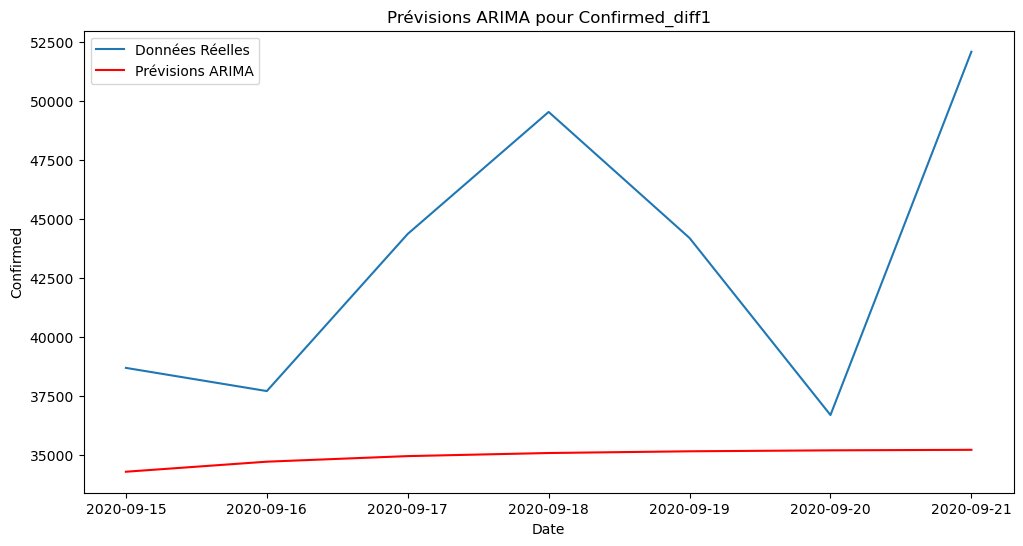

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# Charger vos données
# Assurez-vous que votre DataFrame est trié par date si ce n'est pas déjà le cas
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Diviser les données en échantillon d'apprentissage et échantillon de test
split_date = '2020-09-15'  # Date de division
train_data = us_aggregated_data[us_aggregated_data['Date'] < split_date]
test_data = us_aggregated_data[us_aggregated_data['Date'] >= split_date]

# Sélectionner la colonne "Confirmed" pour l'apprentissage et le test
train_series = train_data['Confirmed_diff1']
test_series = test_data['Confirmed_diff1']

# Créer et ajuster le modèle ARIMA sur l'échantillon d'apprentissage
p = 1  # Ordre de la composante autorégressive
d = 1  # Ordre de différenciation
q = 1  # Ordre de la composante moyenne mobile

model = ARIMA(train_series, order=(p, d, q))
model_fit = model.fit()

# Prévisions sur l'échantillon de test
forecast = model_fit.forecast(steps=len(test_series))

# Calculer le coefficient de détermination (R2) sur l'échantillon d'apprentissage
train_forecast = model_fit.predict(start=0, end=len(train_series) - 1, typ='levels')
r2_train = r2_score(train_series, train_forecast)

# Afficher le R2 sur l'échantillon d'apprentissage
print(f"R2 sur l'échantillon d'apprentissage : {r2_train:.2f}")

# Afficher le R2 sur l'échantillon de test
r2_test = r2_score(test_series, forecast)
print(f"R2 sur l'échantillon de test : {r2_test:.2f}")

# Créer un DataFrame pour afficher les prévisions et les données réelles sur l'échantillon de test
forecast_df = pd.DataFrame({
    'Date': test_data['Date'],
    'Prévisions': forecast,
    'Données Réelles': test_series
})

# Afficher le tableau de prévisions et de données réelles
print(forecast_df)

# Afficher un graphique des prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_series, label='Données Réelles')
plt.plot(test_data['Date'], forecast, color='red', label='Prévisions ARIMA')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.legend()
plt.title('Prévisions ARIMA pour Confirmed_diff1')
plt.show()

In [44]:
### SARIMA

R2 sur l'échantillon d'apprentissage : 0.98
R2 sur l'échantillon de test : -1.07
          Date    Prévisions  Données Réelles
236 2020-09-15  38384.960059          38690.0
237 2020-09-16  40898.621427          37709.0
238 2020-09-17  40633.831325          44360.0
239 2020-09-18  49924.083196          49522.0
240 2020-09-19  44836.905610          44186.0
241 2020-09-20  34795.723705          36695.0
242 2020-09-21  31739.984879          52070.0


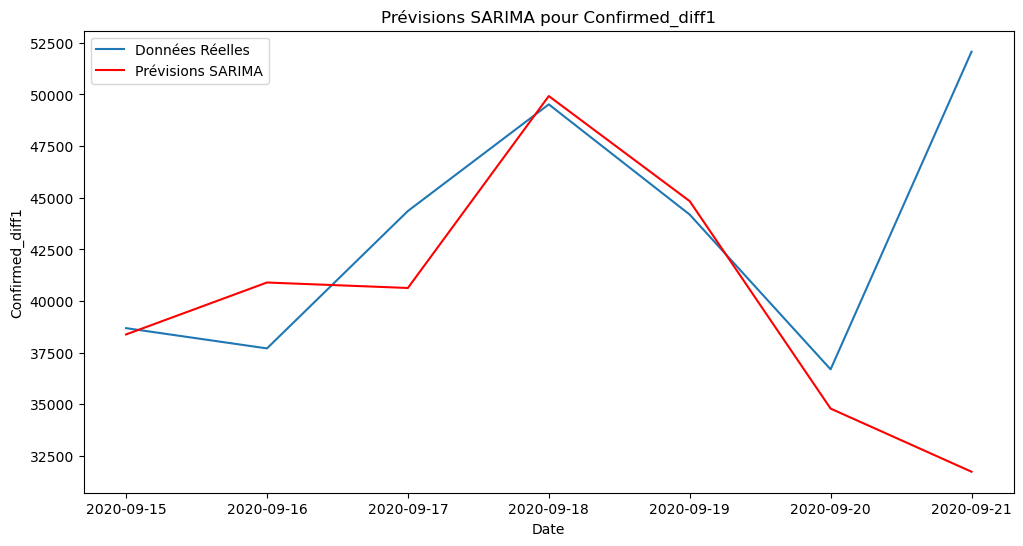

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Charger vos données
# Assurez-vous que votre DataFrame est trié par date si ce n'est pas déjà le cas
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Diviser les données en échantillon d'apprentissage et échantillon de test
split_date = '2020-09-15'  # Date de division
train_data = us_aggregated_data[us_aggregated_data['Date'] < split_date]
test_data = us_aggregated_data[us_aggregated_data['Date'] >= split_date]

# Sélectionner la colonne "Confirmed_diff1" pour l'apprentissage et le test
train_series = train_data['Confirmed_diff1']
test_series = test_data['Confirmed_diff1']

# Spécifier les ordres non saisonniers (p, d, q) et saisonniers (P, D, Q, S) du modèle SARIMA
p = 1  # Ordre de la composante autorégressive non saisonnière
d = 1  # Ordre de différenciation non saisonnière
q = 1  # Ordre de la composante moyenne mobile non saisonnière

P = 1  # Ordre de la composante autorégressive saisonnière
D = 1  # Ordre de différenciation saisonnière
Q = 1  # Ordre de la composante moyenne mobile saisonnière
S = 7  # Période saisonnière (par exemple, 7 jours pour une semaine)

# Créer et ajuster le modèle SARIMA sur l'échantillon d'apprentissage
model = SARIMAX(train_series, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Prévisions sur l'échantillon de test
forecast = model_fit.forecast(steps=len(test_series))

# Calculer le coefficient de détermination (R2) sur l'échantillon d'apprentissage
train_forecast = model_fit.predict(start=0, end=len(train_series) - 1)
r2_train = r2_score(train_series, train_forecast)

# Afficher le R2 sur l'échantillon d'apprentissage
print(f"R2 sur l'échantillon d'apprentissage : {r2_train:.2f}")

# Afficher le R2 sur l'échantillon de test
r2_test = r2_score(test_series, forecast)
print(f"R2 sur l'échantillon de test : {r2_test:.2f}")

# Créer un DataFrame pour afficher les prévisions et les données réelles sur l'échantillon de test
forecast_df = pd.DataFrame({
    'Date': test_data['Date'],
    'Prévisions': forecast,
    'Données Réelles': test_series
})

# Afficher le tableau de prévisions et de données réelles
print(forecast_df)

# Afficher un graphique des prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_series, label='Données Réelles')
plt.plot(test_data['Date'], forecast, color='red', label='Prévisions SARIMA')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff1')
plt.legend()
plt.title('Prévisions SARIMA pour Confirmed_diff1')
plt.show()

In [46]:
### prophet

In [47]:
!pip install prophet

     -------------------------------------- 13.3/13.3 MB 372.7 kB/s eta 0:00:00
     -------------------------------------- 93.0/93.0 kB 759.6 kB/s eta 0:00:00
     ------------------------------------ 801.0/801.0 kB 779.0 kB/s eta 0:00:00


In [48]:
!apt-get update


'apt-get' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [49]:
!pip install pystan
!pip install fbprophet


     ------------------------------------ 325.2/325.2 kB 805.5 kB/s eta 0:00:00
     -------------------------------------- 91.8/91.8 kB 741.7 kB/s eta 0:00:00
     -------------------------------------- 16.2/16.2 MB 533.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
  Running setup.py install for pystan: started
  Running setup.py install for pystan: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20016 lines of output]
  C:\Users\user\AppData\Local\Temp\pip-install-xodty3v8\pystan_0c210ed4f3104b1283ca25710e620574\setup.py:235: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command import install
  Compiling pystan/_api.pyx because it changed.
  Compiling pystan/_chains.pyx because it changed.
  Compiling pystan/_misc.pyx because it changed.
  [1/3] Cythonizing pystan/_api.pyx
  [2/3] Cythonizing pystan/_chains.pyx
  [3/3] Cythonizing pystan/_misc.pyx
  running bdist_wheel
  runn

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\view\transform_view\transform_view_fwd.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\fusion\view\transform_viewIOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     -------------------------------------- 64.0/64.0 kB 680.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
     -------------------------------------- 47.9/47.9 kB 598.1 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 109.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 155.1 kB/s eta 0:00:00
  Using cached aiohttp-3.8.6-cp310-cp310-win_amd64.whl (325 kB)
     ------------------------------------ 155.4/155.4 kB 617.6 kB/s eta 0:00:00
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using ca

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail\counted_base.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail\leaf_state.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail\memory.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\statechart\detail\node_state.hpp

In [50]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as pr

from sklearn.metrics import r2_score

In [51]:

# Assurez-vous que votre DataFrame est trié par date si ce n'est pas déjà le cas
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Diviser les données en échantillon d'apprentissage et échantillon de test
split_date = '2020-09-15'  # Date de division
train_data = us_aggregated_data[us_aggregated_data['Date'] < split_date]
test_data = us_aggregated_data[us_aggregated_data['Date'] >= split_date]

# Sélectionner la colonne "Confirmed_diff1" pour l'apprentissage et le test
train_series = train_data[['Date', 'Confirmed_diff1']].rename(columns={'Date': 'ds', 'Confirmed_diff1': 'y'})
test_series = test_data[['Date', 'Confirmed_diff1']].rename(columns={'Date': 'ds', 'Confirmed_diff1': 'y'})

In [52]:
model = pr.Prophet()
model.fit(train_series)

16:21:23 - cmdstanpy - INFO - Chain [1] start processing
16:21:23 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
forecast = model.predict(test_series)

In [54]:
r2_test = r2_score(test_series['y'], forecast['yhat'])
print(f"R2 sur l'échantillon de test : {r2_test:.2f}")

R2 sur l'échantillon de test : -0.46


          ds          yhat    yhat_lower    yhat_upper
0 2020-09-15  45988.995978  33170.504642  57987.939856
1 2020-09-16  47176.591376  34401.335729  59628.546647
2 2020-09-17  49022.809008  35586.305607  62018.996670
3 2020-09-18  50764.347916  38502.790911  63982.263089
4 2020-09-19  47748.182218  35359.551604  60959.993636
5 2020-09-20  43605.767978  30812.965152  56123.721509
6 2020-09-21  42833.516380  30061.036613  56708.828608


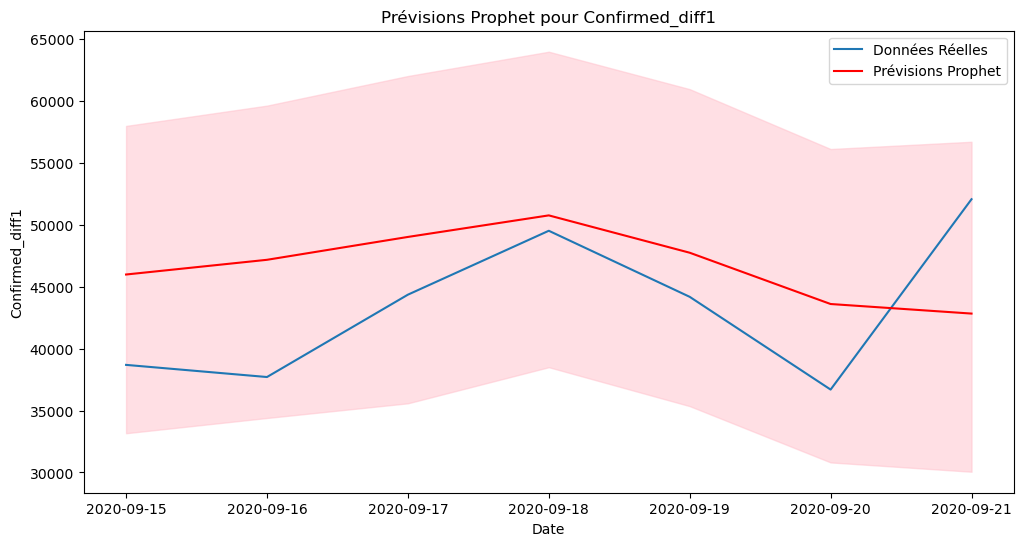

In [55]:
### tableau de prévisions et de données réelles ainsi qu'un graphique des prévisions par rapport aux données réelles
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
plt.figure(figsize=(12, 6))
plt.plot(test_series['ds'], test_series['y'], label='Données Réelles')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Prévisions Prophet')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Confirmed_diff1')
plt.legend()
plt.title('Prévisions Prophet pour Confirmed_diff1')
plt.show()

16:21:23 - cmdstanpy - INFO - Chain [1] start processing
16:21:23 - cmdstanpy - INFO - Chain [1] done processing


R2 sur l'échantillon d'apprentissage : 0.78
MAE sur l'échantillon d'apprentissage : 8187.69


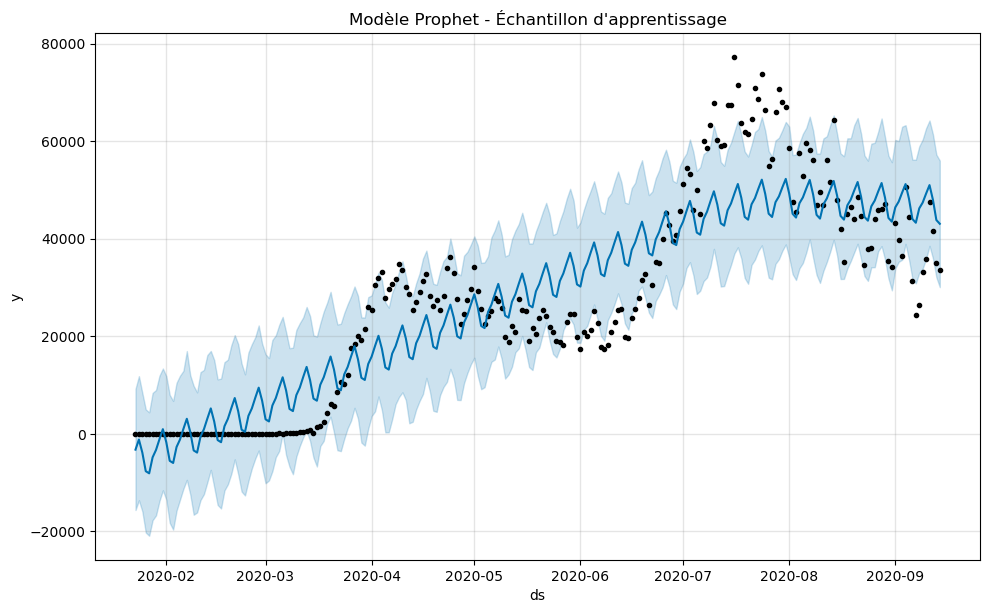

In [56]:
# Créez un modèle Prophet
model = pr.Prophet()
# Ajustez le modèle sur les données d'apprentissage
model.fit(train_series)

# Prévisions sur l'échantillon d'apprentissage
forecast = model.predict(train_series)

# Calculer le coefficient de détermination (R2) sur l'échantillon d'apprentissage
r2_train = r2_score(train_series['y'], forecast['yhat'])
print(f"R2 sur l'échantillon d'apprentissage : {r2_train:.2f}")

# Calculer l'erreur moyenne absolue (MAE) sur l'échantillon d'apprentissage
mae_train = mean_absolute_error(train_series['y'], forecast['yhat'])
print(f"MAE sur l'échantillon d'apprentissage : {mae_train:.2f}")

# Afficher le graphique des prévisions par rapport aux données réelles pour l'échantillon d'apprentissage
fig = model.plot(forecast)
plt.title('Modèle Prophet - Échantillon d\'apprentissage')
plt.show()

16:21:24 - cmdstanpy - INFO - Chain [1] start processing
16:21:24 - cmdstanpy - INFO - Chain [1] done processing


        Date    Prévisions  Données Réelles
0 2020-09-15  45988.995978          38690.0
1 2020-09-16  47176.591376          37709.0
2 2020-09-17  49022.809008          44360.0
3 2020-09-18  50764.347916          49522.0
4 2020-09-19  47748.182218          44186.0
5 2020-09-20  43605.767978          36695.0
6 2020-09-21  42833.516380          52070.0


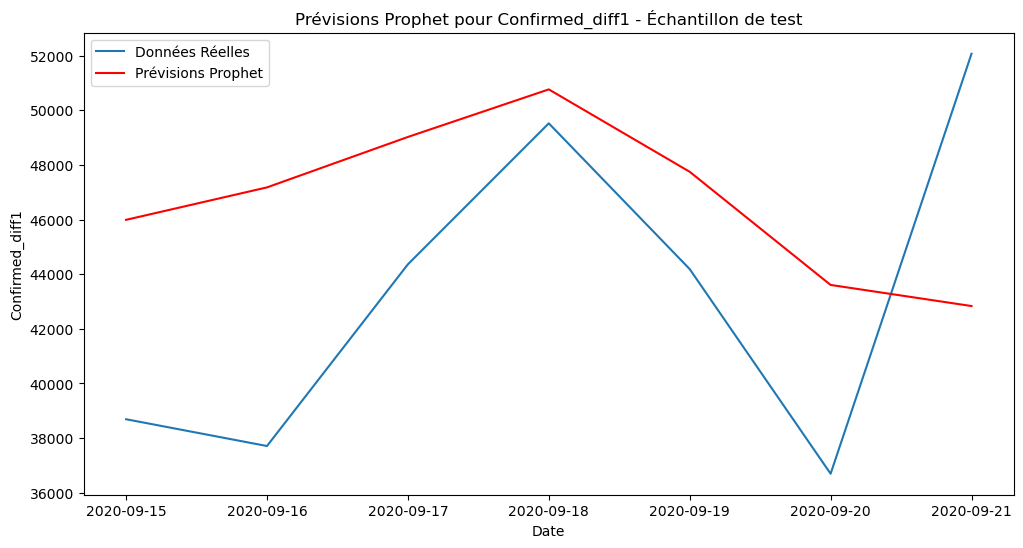

In [57]:
# Créez un modèle Prophet
model = pr.Prophet()

# Ajustez le modèle sur les données d'apprentissage
model.fit(train_series)

# Prévisions sur l'échantillon de test
forecast = model.predict(test_series)

# Affichez le tableau de prévisions et de données réelles pour l'échantillon de test
forecast_df = forecast[['ds', 'yhat']]
forecast_df.rename(columns={'ds': 'Date', 'yhat': 'Prévisions'}, inplace=True)
forecast_df['Données Réelles'] = test_series['y'].values

print(forecast_df)

# Affichez un graphique des prévisions par rapport aux données réelles pour l'échantillon de test
plt.figure(figsize=(12, 6))
plt.plot(test_series['ds'], test_series['y'], label='Données Réelles')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Prévisions Prophet')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff1')
plt.legend()
plt.title('Prévisions Prophet pour Confirmed_diff1 - Échantillon de test')
plt.show()

In [58]:
### modele STL

In [59]:
# Assurez-vous que votre DataFrame est trié par date si ce n'est pas déjà le cas
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Diviser les données en échantillon d'apprentissage et échantillon de test
split_date = '2020-09-15'  # Date de division
train_data = us_aggregated_data[us_aggregated_data['Date'] < split_date]
test_data = us_aggregated_data[us_aggregated_data['Date'] >= split_date]

# Sélectionner la colonne "Confirmed_diff1" pour l'apprentissage et le test
train_series = train_data[['Date', 'Confirmed_diff1']].rename(columns={'Date': 'ds', 'Confirmed_diff1': 'y'})

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Créez un modèle de décomposition saisonnière
seasonal_period = 7  # Saison de 7 jours pour des données journalières
result = seasonal_decompose(train_series, model='additive', period=seasonal_period)

# Obtenez les composantes de saisonnalité
seasonal = result.seasonal
trend = result.trend
residual = result.resid

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:

# Remplacez les NaN par des zéros dans la composante résiduelle
residual = residual.fillna(0)

# Calculer le coefficient de détermination (R2) pour chaque composante
r2_seasonal = r2_score(train_series['y'], seasonal)
r2_trend = r2_score(train_series['y'], trend)
r2_residual = r2_score(train_series['y'], residual)

print(f"R2 pour la composante saisonnière : {r2_seasonal:.2f}")
print(f"R2 pour la composante de tendance : {r2_trend:.2f}")
print(f"R2 pour la composante résiduelle : {r2_residual:.2f}")

# Calculer l'erreur quadratique moyenne (MSE) pour chaque composante
mse_seasonal = mean_squared_error(train_series['y'], seasonal)
mse_trend = mean_squared_error(train_series['y'], trend)
mse_residual = mean_squared_error(train_series['y'], residual)

print(f"MSE pour la composante saisonnière : {mse_seasonal:.2f}")
print(f"MSE pour la composante de tendance : {mse_trend:.2f}")
print(f"MSE pour la composante résiduelle : {mse_residual:.2f}")

In [ ]:
### insghits :
R2 pour la composante saisonnière : -1.74 - Cela indique un mauvais ajustement pour la composante saisonnière.

R2 pour la composante de tendance : 0.93 - Cela indique un très bon ajustement pour la composante de tendance.

R2 pour la composante résiduelle : -1.73 - Cela indique un mauvais ajustement pour la composante résiduelle.

MSE pour la composante saisonnière : 1205336250.39 - Une MSE élevée pour la composante saisonnière indique une grande variance par rapport aux données réelles.

MSE pour la composante de tendance : 31263353.65 - Une MSE beaucoup plus faible pour la composante de tendance indique un ajustement de haute qualité.

MSE pour la composante résiduelle : 1200862659.39 - Une MSE élevée pour la composante résiduelle indique une grande variance par rapport aux données réelles.

Il semble que la composante de tendance soit la mieux ajustée, tandis que la composante saisonnière et la composante résiduelle ne sont pas bien ajustées aux données réelles.

In [ ]:
# Créez un graphique pour chaque composante et affichez les prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))

# Composante saisonnière
plt.subplot(311)
plt.plot(train_series['ds'], seasonal, label='Saisonnière')
plt.xlabel('Date')
plt.ylabel('Saisonnière')
plt.legend()

# Composante de tendance
plt.subplot(312)
plt.plot(train_series['ds'], trend, label='Tendance')
plt.xlabel('Date')
plt.ylabel('Tendance')
plt.legend()

# Composante résiduelle
plt.subplot(313)
plt.plot(train_series['ds'], residual, label='Résiduelle')
plt.xlabel('Date')
plt.ylabel('Résiduelle')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Créez un graphique global des prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))
plt.plot(train_series['ds'], train_series['y'], label='Données Réelles')
plt.plot(train_series['ds'], seasonal + trend + residual, color='red', label='Prévisions')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.title('Prévisions STL vs Données Réelles')
plt.show()




In [ ]:
#### modèles de réseaux de neurones récurrents (RNN) tels que le LSTM (Long Short-Term Memory)

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf

# Charger vos données (assurez-vous qu'elles sont triées par date)
us_aggregated_data = us_aggregated_data.sort_values(by='Date')

# Sélectionner la colonne "Confirmed_diff1" pour la modélisation
data = us_aggregated_data[['Date', 'Confirmed_diff1']]

# Normaliser les données
scaler = MinMaxScaler()
data['Confirmed_diff1'] = scaler.fit_transform(data['Confirmed_diff1'].values.reshape(-1, 1))

# Division en échantillon d'apprentissage et échantillon de test
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Fonction pour préparer les séquences de données pour le modèle LSTM
def prepare_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data.iloc[i+n_steps, 1])
    return np.array(X), np.array(y)

n_steps = 7  # Nombre de pas de temps à utiliser pour la prédiction
X_train, y_train = prepare_sequences(train_data, n_steps)
X_test, y_test = prepare_sequences(test_data, n_steps)

# Création du modèle LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Prévision sur l'échantillon de test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Rétablir les valeurs originales

# Calculer le coefficient de détermination (R2) sur l'échantillon de test
r2 = r2_score(y_test, y_pred)
print(f"R2 sur l'échantillon de test : {r2:.2f}")

# Calculer l'erreur moyenne quadratique (MSE) sur l'échantillon de test
mse = mean_squared_error(y_test, y_pred)
print(f"MSE sur l'échantillon de test : {mse:.2f}")

# Afficher le graphique des prévisions par rapport aux données réelles
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'].iloc[n_steps:], test_data['Confirmed_diff1'].iloc[n_steps:], label='Données Réelles')
plt.plot(test_data['Date'].iloc[n_steps:], y_pred, color='red', label='Prévisions LSTM')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff1')
plt.legend()
plt.title('Prévisions LSTM pour Confirmed_diff1')
plt.show()